In [1]:
%matplotlib inline

In [1]:
from erddapy import ERDDAP


e = ERDDAP(server='https://data.ioos.us/gliders/erddap')

In [2]:
min_lat, max_lat = 20, 30
min_lon, max_lon = -82, -97
        
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': min_lon,
    'max_lon': max_lon,
    'min_lat': min_lat,
    'max_lat': max_lat,
    'min_time': '2018-08-10T00:00:00Z',
    'max_time': '2018-10-23T00:00:00Z',
    'cdm_data_type': 'trajectoryprofile'
}

In [3]:
import pandas as pd


search_url = e.get_search_url(response='csv', **kw)

search = pd.read_csv(search_url)
gliders = search['Dataset ID'].values
print('Found {} Glider Datasets:\n{}'.format(len(gliders), '\n'.join(gliders)))

Found 18 Glider Datasets:
allrutgersGliders
allsecooraGliders
ng228-20180801T0000
ng230-20180801T0000
ng257-20180801T0000
ng258-20180801T0000
ng261-20180801T0000
ng279-20180801T0000
ng288-20180801T0000
ng290-20180701T0000
ng295-20180701T0000
ng296-20180701T0000
ng309-20180701T0000
ng342-20180701T0000
ng429-20180701T0000
ng448-20180701T0000
ng450-20180701T0000
sam-20180824T0000


In [12]:
server = 'https://data.ioos.us/gliders/erddap'

#dataset_id = 'Sverdrup-20180509T1742'
#dataset_id = 'sam-20180824T0000'
dataset_id = 'ng288-20180801T0000'


variables = [
 'depth',
 'latitude',
 'longitude',
 'salinity',
 'temperature',
 'time',
]

In [13]:
from erddapy import ERDDAP


e = ERDDAP(
    server=server,
    protocol='tabledap',
)

e.dataset_id = dataset_id
e.variables = variables
        
print(
    e.get_download_url(
        response='mat',
    )
)

https://data.ioos.us/gliders/erddap/tabledap/ng288-20180801T0000.mat?depth,latitude,longitude,salinity,temperature,time


In [14]:
df = e.to_pandas(
    index_col='time',
    parse_dates=True,
    skiprows=(1,)
).dropna()

df.head()

,depth,latitude,longitude,salinity,temperature
time,,,,,
2018-08-21 03:44:15,0.992094,27.339478,-85.563141,35.689182,30.417562
2018-08-21 03:44:15,1.061540,27.339478,-85.563141,35.689510,30.416750
2018-08-21 03:44:15,1.140908,27.339478,-85.563141,35.689960,30.417750
2018-08-21 03:44:15,1.230196,27.339478,-85.563141,35.690530,30.417400
2018-08-21 03:44:15,1.299642,27.339478,-85.563141,35.691254,30.417627


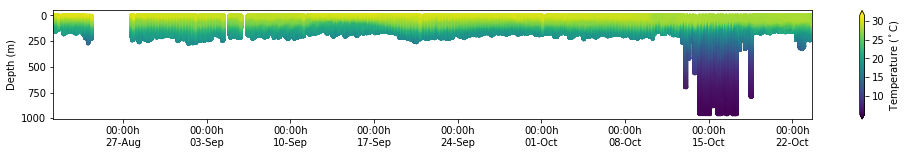

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'],
                marker='o', edgecolor='none')

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');

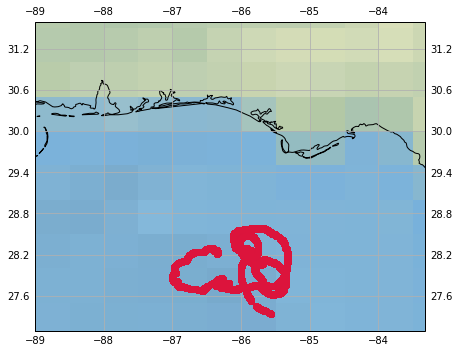

In [16]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(7, 7)
)
ax.plot(df['longitude'], df['latitude'], color='crimson', marker='o')
ax.stock_img()
ax.gridlines(draw_labels=True)
ax.coastlines('10m')
ax.set_extent([df['longitude'].min()-2, df['longitude'].max()+2,
               df['latitude'].min()-0.25, df['latitude'].max()+3]);